In [59]:

library(readr)
library(dplyr)
library(ggplot2)
library(lubridate)


## TWEETS FILTERED BY: '8802752','9317502','14594813'
#ESTADÃO #https://twitter.com/intent/user?user_id=9317502 
#G1 #https://twitter.com/intent/user?user_id=8802752 
#FOLHA DE SÃO PAULO #https://twitter.com/intent/user?user_id=14594813 

tweet <-  read_tsv("tweet.csv")
user <-  read_tsv("user.csv")
hashtag <-  read_tsv("hashtag.csv")
url <-  read_tsv("url.csv")
user_mention <-  read_tsv("user_mention.csv")
place <-  read_tsv("place.csv")



Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  id_str = col_double(),
  created_at = col_datetime(format = ""),
  truncated = col_integer(),
  retweet_count = col_integer(),
  quote_count = col_integer(),
  possibly_sensitive = col_integer(),
  is_quoted_status = col_integer(),
  reply_count = col_integer(),
  user = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“6793 parsing failures.
row # A tibble: 5 x 5 col     row col   expected           actual file        expected   <int> <chr> <chr>              <chr>  <chr>       actual 1  7581 text  delimiter or quote ,      'tweet.csv' file 2  7581 text  delimiter or quote V      'tweet.csv' row 3  7581 text  delimiter or quote ,      'tweet.csv' col 4  7581 text  delimiter or quote h      'tweet.csv' expected 5  7581 text  delimiter or quote " "

### Tweet Table

In [60]:
head(tweet)

id,id_str,in_reply_to_user_id,created_at,favourite_count,truncated,contributors,retweet_count,text,text_full,⋯,quote_count,source,possibly_sensitive,in_reply_to_screen_name,is_quoted_status,coordinates,reply_count,lang,user,retweet_from_tweet_id
1.053073e+18,1.053073e+18,14594813,2018-10-18 23:59:09,NULL,0,NULL,0,@folha #caixa2dobolsonaro,NULL,⋯,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,folha,0,NULL,0,und,8.062303e+17,NULL
1.053073e+18,1.053073e+18,14594813,2018-10-18 23:59:10,NULL,0,NULL,0,@folha O maior rato de todos está preso em Curitiba. #MarketeirosDoJair,NULL,⋯,0,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",0,folha,0,NULL,0,pt,1.672649e+07,NULL
1.053073e+18,1.053073e+18,8802752,2018-10-18 23:59:10,NULL,0,NULL,0,"@g1 Datafolha, cadê essas pessoas das pesquisas que nunca aparecem?",NULL,⋯,0,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Lite</a>",0,g1,0,NULL,0,pt,3.260520e+07,NULL
1.053073e+18,1.053073e+18,NULL,2018-10-18 23:59:11,NULL,0,NULL,0,RT @g1: PT pede ao TSE para declarar Jair Bolsonaro inelegível por 8 anos\nhttps://t.co/y547v3DJue #G1 #Eleições2018 https://t.co/bKGk9NaJ1g,NULL,⋯,0,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",0,NULL,0,NULL,0,pt,8.623854e+17,1053055607220170753
1.053073e+18,1.053073e+18,NULL,2018-10-18 23:59:12,NULL,0,NULL,0,"RT @folha: 'Basta prender um empresário e vão entregar a quadrilha toda', diz Haddad sobre campanha de difamação https://t.co/zqSeyzbeue",NULL,⋯,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,NULL,0,NULL,0,pt,9.427594e+17,1053006310164361217
1.053073e+18,1.053073e+18,14594813,2018-10-18 23:59:12,NULL,0,NULL,0,@folha @anallp79 Processa está foice vermelha,NULL,⋯,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,folha,0,NULL,0,pt,2.311405e+08,NULL


### User Table

In [61]:
head(user)

id,id_str,screen_name,created_at,is_translator,name,description,statuses_count,friends_count,followers_count,verified,location,geo_enabled,protected,lang
2511801,2511801,FelipeMeres,2007-03-27 15:52:06,0,Felipe Meres,Artist and writer,40,1924,321,0,"New York, USA",1,0,en
3011101,3011101,marinhos,2007-03-30 20:27:11,0,Marinhos,"Sou Netzen:não nasci assim,não cresci assim, não fui sempre assim. I’m Netzen:I was not born that way, I did not grow up like this, I was not always like this.",32991,193,365,0,"Here, there and everywhere.",0,0,pt
3493611,3493611,OneLag,2007-04-05 05:37:05,0,Galeno Lima 1️⃣3⃣,"Jornalista, Analista de Audiência e Estratégias Digitais @Estadao | Journo & Business Intelligence Analyst",89575,2936,1880,0,"Sao Paulo, Brazil",1,0,en
5751852,5751852,wtamanaha,2007-05-03 21:53:05,0,Steemit.com/@wagnertamanaha,Criação em redes sociais,8853,3528,3072,0,Sao Paulo - Brasil,1,0,pt
5815472,5815472,Olivari,2007-05-06 20:36:58,0,Olivari,NULL,182,105,58,0,"São Paulo, Brasil",1,0,pt
6459342,6459342,joaninha,2007-05-31 02:09:04,0,Joana,autosabotage girl,7892,546,614,0,brazil,0,0,en


### Hashtag Table

In [62]:
head(hashtag)

id,text,tweet
1,caixa2dobolsonaro,1.053073e+18
2,MarketeirosDoJair,1.053073e+18
3,G1,1.053073e+18
4,Eleições2018,1.053073e+18
5,G1,1.053073e+18
6,Eleições2018,1.053073e+18


### URL Table

In [63]:
head(url)

id,expanded_url,url,display,tweet
1,https://g1.globo.com/politica/eleicoes/2018/noticia/2018/10/18/pt-pede-ao-tse-para-declarar-jair-bolsonaro-inelegivel-por-oito-anos.ghtml?utm_source=twitter&utm_medium=social&utm_campaign=g1,https://t.co/y547v3DJue,g1.globo.com/politica/eleic…,1.053073e+18
2,https://www1.folha.uol.com.br/poder/2018/10/basta-prender-um-empresario-e-vao-entregar-a-quadrilha-toda-diz-haddad-sobre-campanha-de-difamacao.shtml?utm_source=twitter&utm_medium=social&utm_campaign=twfolha,https://t.co/zqSeyzbeue,www1.folha.uol.com.br/poder/2018/10/…,1.053073e+18
3,https://www1.folha.uol.com.br/poder/2018/10/dono-da-havan-quer-direito-de-resposta-contra-a-folha-por-materia-sobre-whatsapp.shtml?utm_source=twitter&utm_medium=social&utm_campaign=twfolha,https://t.co/6oDEF2Y3io,www1.folha.uol.com.br/poder/2018/10/…,1.053073e+18
4,https://www1.folha.uol.com.br/poder/2018/10/empresarios-bancam-campanha-contra-o-pt-pelo-whatsapp.shtml?utm_source=twitter&utm_medium=social&utm_campaign=twfolha,https://t.co/mfCVD9w1cl,www1.folha.uol.com.br/poder/2018/10/…,1.053073e+18
5,https://twitter.com/i/web/status/1053073055537348609,https://t.co/PAfeozS8aH,twitter.com/i/web/status/1…,1.053073e+18
6,https://g1.globo.com/politica/eleicoes/2018/noticia/2018/10/18/pt-pede-ao-tse-para-declarar-jair-bolsonaro-inelegivel-por-oito-anos.ghtml?utm_source=twitter&utm_medium=social&utm_campaign=g1,https://t.co/y547v3DJue,g1.globo.com/politica/eleic…,1.053073e+18


### User_Mention Table

In [64]:
head(user_mention)

id,tweet,id_user,name,screen_name
1,1.053073e+18,14594813,Folha de S.Paulo,folha
2,1.053073e+18,8802752,G1,g1
3,1.053073e+18,14594813,Folha de S.Paulo,folha
4,1.053073e+18,8802752,G1,g1
5,1.053073e+18,14594813,Folha de S.Paulo,folha
6,1.053073e+18,14594813,Folha de S.Paulo,folha


### Place Table

In [65]:
head(place)

id,tweet,full_name,name,place_type,country,country_code
1,1.053073e+18,"Brusque, Brasil",Brusque,city,Brasil,BR
2,1.053074e+18,"Recife, Brasil",Recife,city,Brasil,BR
3,1.053074e+18,"Santos, Brasil",Santos,city,Brazil,BR
4,1.053075e+18,"Campinas, Brasil",Campinas,city,Brasil,BR
5,1.053075e+18,"Salvador, Brasil",Salvador,city,Brasil,BR
6,1.053075e+18,"Rio de Janeiro, Brasil",Rio de Janeiro,city,Brasil,BR


### Number of Tweets for each News Portal

In [66]:
tweet %>% 
  filter(user %in% c(8802752,9317502,14594813)) %>% 
  group_by(user) %>% 
  summarise(tweets = n())

user,tweets
8802752,46
9317502,31
14594813,48


### Number of Reply Tweets for each News Portal

In [67]:
tweet %>% 
  filter(in_reply_to_user_id %in% c(8802752,9317502,14594813)) %>% 
  group_by(in_reply_to_user_id) %>% 
  summarise(reply_tweets = n())


in_reply_to_user_id,reply_tweets
14594813,7805
8802752,1501
9317502,1605


### Number of Retweets

In [68]:
tweet %>% 
  filter(retweet_from_tweet_id == "NULL") %>% 
  summarise(retweets = n())


retweets
11096


In [69]:
tweet$created_at<- ymd_hms(tweet$created_at)

tweet <- tweet %>% 
  mutate("created_at_time" = paste(paste(year(created_at),month(created_at),day(created_at), sep = "-"),hour(created_at)))

tweet_time <- tweet %>% 
  group_by(created_at_time) %>% 
  summarise(total = n())


### Tweets by hour

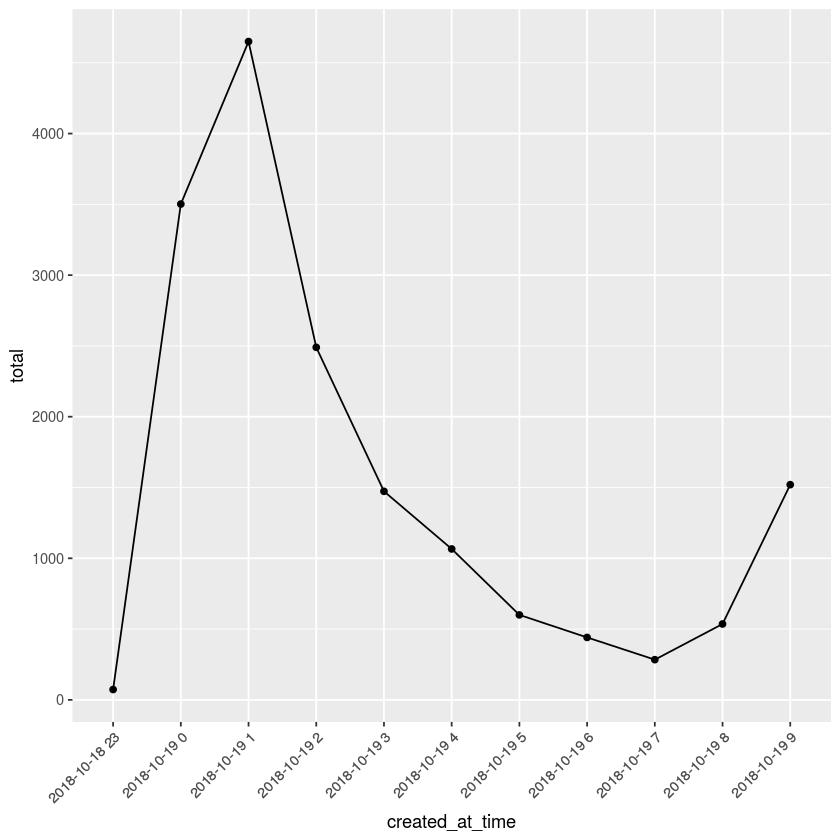

In [70]:
ggplot(tweet_time, aes(x=created_at_time, y=total, group=1)) + 
geom_line()  + geom_point() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))